In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd #data cleaning, manipulation and analysis
from urllib.request import Request, urlopen #open URLs 
from urllib.error import URLError, HTTPError #handle errors that may occur when making HTTP requests 
from bs4 import BeautifulSoup #extract data from HTML
import re #manipulating text patterns
import numpy as np #array manipulation
import plotly.express as px #creating interactive data plots
import plotly.graph_objects as go #creating interactive data plots

VOTER DEMOGRAPHICS


In [ ]:
df1 = pd.read_excel('/content/drive/MyDrive/project/Voter_demographic_states.xlsx') #reading in the data file
df1.head(20)

#the data frame has a lot of empty spaces filled with nan values

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning:

Cannot parse header or footer so it will be ignored



,"Table with row headers in columns A and B, and column headers in rows 5 through 6.",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,"Table 4b. Reported Voting and Registration, b...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(In thousands),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,STATE,"Sex, Race, and Hispanic-Origin",Total population,Total citizen population,Registered,NaN,NaN,NaN,NaN,Voted,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Total registered,Percent registered\n(Total),Margin of error 1,Percent registered\n(Citizen),Margin of error 1,Total voted,Percent voted\n(Total),Margin of error 1,Percent voted\n(Citizen),Margin of error 1
5,US,Total,252274,231593,168308,67,0,73,0,154628,61,0,67,0
6,NaN,Male,121870,111485,79340,65,0,71,0,72474,60,0,65,0
7,NaN,Female,130404,120108,88968,68,0,74,0,82154,63,0,68,0
8,NaN,White alone,195227,181891,134889,69,0,74,0,124301,64,0,68,0
9,NaN,White non-Hispanic alone,157442,154827,118389,75,0,76,0,109830,70,0,71,0


In [ ]:
df1 = df1.drop(index=range(5)) #removing the first few empty rows to clean the data frame

In [ ]:
# Dividing the entire data framw into two different dataframes
us_demo = df1.iloc[:11] #delecting the first 11 rows 
us_demo
del us_demo['Table with row headers in columns A and B, and column headers in rows 5 through 6.'] #deleting columns that won't be necessary

In [ ]:
#deleting columns that won't be necessary
del us_demo['Unnamed: 6']
del us_demo['Unnamed: 8']
del us_demo['Unnamed: 11']
del us_demo['Unnamed: 13']
#Changing the column names 
cols = ['Sex, Race and Hispanic Origin', 'Total Population', 'Total Citizen Population', 'Total Registered', 'Percent Registered Total', 'Percent Registered Citizen', 'Total Voted', 'Percent Voted Total', 'Percent Voted Citizen']
us_demo = pd.DataFrame(us_demo.values, columns=cols)
#the clean datafarme of the US demographics during the 2020 elections
us_demo 

,"Sex, Race and Hispanic Origin",Total Population,Total Citizen Population,Total Registered,Percent Registered Total,Percent Registered Citizen,Total Voted,Percent Voted Total,Percent Voted Citizen
0,Total,252274,231593,168308,66.7,72.7,154628,61.3,66.8
1,Male,121870,111485,79340,65.1,71.2,72474,59.5,65
2,Female,130404,120108,88968,68.2,74.1,82154,63,68.4
3,White alone,195227,181891,134889,69.1,74.2,124301,63.7,68.3
4,White non-Hispanic alone,157442,154827,118389,75.2,76.5,109830,69.8,70.9
5,Black alone,32219,30204,20844,64.7,69,18922,58.7,62.6
6,Asian alone,16094,11530,7354,45.7,63.8,6881,42.8,59.7
7,Hispanic (of any race),42468,30627,18719,44.1,61.1,16459,38.8,53.7
8,White alone or in combination,199610,185983,137710,69,74,126753,63.5,68.2
9,Black alone or in combination,34471,32275,22241,64.5,68.9,20152,58.5,62.4


In [ ]:
#deleting columns that won't be necessary
us_demo_state = df1.iloc[11:572] #selecting the necessary rows for the dataframe 
del us_demo_state['Table with row headers in columns A and B, and column headers in rows 5 through 6.']
del us_demo_state['Unnamed: 6']
del us_demo_state['Unnamed: 8']
del us_demo_state['Unnamed: 11']
del us_demo_state['Unnamed: 13']
us_demo_state = pd.DataFrame(us_demo_state.values, columns=cols) #renaming the column names 

#list of abbr us states
states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

#assigning the abbr names to a column called states which is repeated 11 times as there are 11 demographic categories
us_demo_state['State'] = [state for state in states for i in range(11)] 


us_demo_state


,"Sex, Race and Hispanic Origin",Total Population,Total Citizen Population,Total Registered,Percent Registered Total,Percent Registered Citizen,Total Voted,Percent Voted Total,Percent Voted Citizen,State
0,Total,3769,3716,2527,67,68,2247,59.6,60.5,AL
1,Male,1780,1755,1187,66.7,67.6,1038,58.4,59.2,AL
2,Female,1990,1960,1340,67.3,68.4,1209,60.7,61.6,AL
3,White alone,2657,2619,1860,70,71,1647,62,62.9,AL
4,White non-Hispanic alone,2587,2569,1825,70.6,71,1617,62.5,63,AL
...,...,...,...,...,...,...,...,...,...,...
556,Asian alone,2,-,-,B,B,-,B,B,WY
557,Hispanic (of any race),40,38,23,B,B,21,B,B,WY
558,White alone or in combination,422,416,290,68.6,69.6,273,64.7,65.7,WY
559,Black alone or in combination,4,3,3,B,B,3,B,B,WY


In [ ]:
##barplot to show the total population distribution across different demographics
fig = go.Figure(go.Bar(x=us_demo['Sex, Race and Hispanic Origin'],y=us_demo['Total Population'],text=us_demo['Total Population'],textposition='auto',marker=dict(color='rgb(158,202,225)',line=dict(color='rgb(8,48,107)',width=1.5),),))

fig.update_layout(title='Total Population',xaxis_tickangle=-45,yaxis=dict(title='Total Population',range=[15000, 300000],dtick=100000,),)

fig.show()

In [ ]:
##barplot to show the total population distribution that voted across different demographics
fig = px.bar(us_demo, x='Sex, Race and Hispanic Origin', y='Percent Voted Total', color='Sex, Race and Hispanic Origin', title='Total Population that Voted')

fig.show()


In [ ]:
##scatter plot  to show the total population distribution that voted vs the total population distribution that is registered to vote 
fig = px.scatter(us_demo, x="Percent Registered Total", y="Percent Voted Total", color="Sex, Race and Hispanic Origin",hover_data=["Percent Registered Citizen", "Percent Voted Citizen"])

fig.show()

In [ ]:
#plot presents the total population that voted across different states
fig = go.Figure(data=go.Choropleth(locations=us_demo_state['State'], z=us_demo_state['Percent Voted Total'], locationmode='USA-states',colorscale='Blues', colorbar_title="Percent Voted"))

fig.update_layout(title_text='Percent of Total Population That Voted in Each US State',geo_scope='usa',width=800,height=500)

fig.show()

In [ ]:
#plot presents the total population that is registered to voted across different states
fig = go.Figure(data=go.Choropleth(locations=us_demo_state['State'], z=us_demo_state['Percent Registered Total'], locationmode='USA-states',colorscale='Greens', colorbar_title="Percent Registered"))

fig.update_layout(title_text='Percent of Total Population That is Registered to vote in Each US State',geo_scope='usa',width=800,height=500)

fig.show()

In [ ]:
#defining a function that takes in any url, parses the webpage and returns a pandas data frame that contains all the data from the webpage
def html_parse(url):
    hdr = {'User-Agent': 'Mozilla/5.0'} #assigning a user agent to prevent requests from being blocked by the server
    req = Request(url, headers=hdr)
    
    try:
        page = urlopen(req) #opening the url page
    except HTTPError as e:
        return f'HTTP error occurred: {e.code}' #printing error code incase of any
    except URLError as e:
        return f'URL error occurred: {e.reason}'
    
    html = page.read().decode("utf8") #decoding bytes to strings in the html data
    htmlsoup = BeautifulSoup(html, 'html.parser') #extracting all the data in the html file
    
    tables = htmlsoup.find_all('tbody')  #looking and extracting table bodies from htmlsoup
    if not tables:
        return 'No tables found'
    
    rows_list = [] 
    for table in tables:   #iterate through all table bodies and append all data in the rows into rowlist which is an empty list created initially 
        rows = table.find_all('tr')
        for row in rows:
            cells = row.find_all('td')
            row_list = [cell.text for cell in cells]
            rows_list.append(row_list)
            
    df = pd.DataFrame(rows_list)  #convert rowlist to pandas data frame
    return df



In [ ]:
#All the urls to be used 
url1 = "https://www.opensecrets.org/2020-presidential-race/financial-disclosures-and-net-worth" #networth
url2 = "https://www.opensecrets.org/2020-presidential-race/campaign-committees-and-outside-groups?type=C" #funds raised
url3 = "https://www.opensecrets.org/2020-presidential-race/joe-biden/expenditures?id=N00001669" #expenditure JB
url4 = "https://www.foxnews.com/elections/2020/general-results" #election results
url5 = "https://www.opensecrets.org/2020-presidential-race/donald-trump/expenditures?id=N00023864" #expenditure DT
url6 = "https://www.opensecrets.org/2020-presidential-race/joe-biden/contributors?id=N00001669" #contributors JB
url7 = "https://www.opensecrets.org/2020-presidential-race/donald-trump/contributors?id=N00023864"#contributors DT

In [ ]:
net_worth = html_parse(url1) #net worth of both the candidates
raised = html_parse(url2)  #funds raised by both the candidates
totalad_b = html_parse(url3) #total expenditure for Biden

In [ ]:
elec_res = html_parse(url4) #election results
totalad_t = html_parse(url5) #total expenditure for Trump
cont_b = html_parse(url6) #contributors  
cont_t = html_parse(url7) #contributors

In [ ]:
new_cols = ['Candidate Name', 'Minimum Networth', 'Maximum Networth', 'File', 'Filing Date'] #renaming columns
new_net_worth = pd.DataFrame(net_worth.values, columns=new_cols)
new_net_worth = new_net_worth.drop('File', axis=1)
new_net_worth = new_net_worth.drop('Filing Date', axis=1)#dropping columns that wont be required.

new_col2 = ['Candidate Name', 'Organization', 'Type', 'Amount Raised', 'Status']#renaming columns
new_raised = pd.DataFrame(raised.values, columns=new_col2)#funds raised

new_col4 = ['Area', 'Amount', 'Percentage']#renaming columns
new_totalad_b = pd.DataFrame(totalad_b.values, columns=new_col4)#expenditure(Biden)

new_col5 = ['Candidate', 'Votes', 'Percentage']#renaming columns
new_elec_res = pd.DataFrame(elec_res.values, columns=new_col5)#electionresults

new_col3 = ['Area', 'Amount', 'Percentage']#renaming columns
new_totalad_t = pd.DataFrame(totalad_t.values, columns=new_col3)#expenditure(Trump)

In [ ]:
#defining functions that take in values and return cleaned values by removing any non alphabetic, non numeric, $\,- characters 
pattern1 = '[^0-9a-zA-Z]+'
def clean_string(value):
    return re.sub(pattern1, '', str(value))



pattern2 = '[^0-9]'
def clean_int(value):
    if pd.isnull(value):
        return None
    else:
        return int(re.sub(pattern2, '', str(value)))



def clean(value):
    pattern1 = ','
    pattern2 = '\$'
    pattern3 = '-'
    pattern4 = '[^\d]'
    if not value or value == '-':
        return None
    else:
        return int(re.sub(pattern4, '', str(value)).replace(pattern1,'').replace(pattern2,'').replace(pattern3,''))






NET WORTH


In [ ]:
new_net_worth.head() #the df has values with, and $

,Candidate Name,Minimum Networth,Maximum Networth
0,Biden Joe Biden,"$2,137,033","$7,924,998"
1,Trump Donald Trump,"$930,070,182","$1,697,133,057"
2,Bennet Michael Bennet,"$6,527,029","$25,630,000"
3,Bloomberg Michael Bloomberg,-,-
4,Booker Cory Booker,"$480,006","$1,050,000"


In [ ]:
#applying the previously defined function to the columns
new_net_worth['Minimum Networth'] = new_net_worth['Minimum Networth'].apply(clean)
new_net_worth['Maximum Networth'] = new_net_worth['Maximum Networth'].apply(clean)
pd.options.display.float_format = '{:.0f}'.format #to change values that were generated in scientific notation to float

In [ ]:
net = new_net_worth.iloc[:2]#selecting rows with the candidates 
net #cleaned df


,Candidate Name,Minimum Networth,Maximum Networth
0,Biden Joe Biden,2137033,7924998
1,Trump Donald Trump,930070182,1697133057


In [ ]:
#barplot presents the minimum and the maximum net worth of Joe Biden vs Donald Trump
melted_df = pd.melt(net, id_vars=['Candidate Name'], value_vars=['Minimum Networth', 'Maximum Networth'])

fig = px.bar(melted_df, x='Candidate Name', y='value', color='variable', barmode='group')

fig.update_layout(xaxis_title="Candidate Name",yaxis_title="Net Worth (in USD)",title="Net Worth of 2020 US Presidential Candidates")

fig.show()


FUNDS RAISED

In [ ]:
new_raised.head()#the df has values with, and $

,Candidate Name,Organization,Type,Amount Raised,Status
0,BIDEN,Biden for President,Campaign,"$1,044,187,828",Supports
1,TRUMP,Donald J Trump for President,Campaign,"$773,954,550",Supports
2,BIDEN,Future Forward USA,Carey,"$151,401,586",Supports
3,TRUMP,America First Action,SuperPAC,"$150,128,473",Supports
4,BIDEN,Priorities USA Action,Carey,"$139,463,406",Supports


In [ ]:
#applying the previously defined function to the columns
new_raised['Amount Raised'] = new_raised['Amount Raised'].apply(clean)
pd.options.display.float_format = '{:.0f}'.format #to change values that were generated in scientific notation to float
new_raised

,Candidate Name,Organization,Type,Amount Raised,Status
0,BIDEN,Biden for President,Campaign,1044187828,Supports
1,TRUMP,Donald J Trump for President,Campaign,773954550,Supports
2,BIDEN,Future Forward USA,Carey,151401586,Supports
3,TRUMP,America First Action,SuperPAC,150128473,Supports
4,BIDEN,Priorities USA Action,Carey,139463406,Supports
...,...,...,...,...,...
157,BIDEN,Students for Biden,PAC,0,Supports
158,TRUMP,RallyPAC,SuperPAC,0,Supports
159,TRUMP,Real Deal Tar Heels,SuperPAC,0,Opposes
160,TRUMP,Real People for America,SuperPAC,0,Supports


In [ ]:
#separating the data frame to two different ones for each candidate
raised_b = new_raised.loc[new_raised['Candidate Name'].isin(['BIDEN'])] 
raised_t = new_raised.loc[new_raised['Candidate Name'].isin(['TRUMP'])]


In [ ]:
#barplot shows top 10 Committees that raised the highest amount for Joe Biden
b = raised_b.sort_values('Amount Raised', ascending=False).head(10)
fig = px.bar(b, x='Organization', y='Amount Raised', color='Organization',labels={'Amount Raised': 'Amount Raised (in millions)'}, title='Top 10 Committees based on Amount Raised')
fig.show()

In [ ]:
#barplot shows top 10 Committees that raised the highest amount for Donald Trump
t = raised_t.sort_values('Amount Raised', ascending=False).head(10)
fig = px.bar(t, x='Organization', y='Amount Raised', color='Organization',labels={'Amount Raised': 'Amount Raised (in millions)'}, title='Top 10 Committees based on Amount Raised')
fig.show()


In [ ]:
#grouping the df by name and summing the amount to get a total number 
grouped_raised = new_raised.groupby('Candidate Name')['Amount Raised'].sum().reset_index()
grouped_raised = grouped_raised.drop([1,2])
grouped_raised


,Candidate Name,Amount Raised
0,BIDEN,1625284165
3,TRUMP,1120028019


In [ ]:
#horizontal bar plot shows the total amount raised by Joe Biden vs Donald Trump
fig = px.bar(grouped_raised, x='Amount Raised', y='Candidate Name', orientation='h', color='Candidate Name',title='Total Amount Raised by Biden vs Trump in 2020 Elections')
fig.show()

In [ ]:
col4 = ['Contributers', 'Amount'] #renaming columns
cont_t = pd.DataFrame(cont_t.values, columns=col4)
cont_t['Amount'] = cont_t['Amount'].apply(clean) ##applying the previously defined function to the columns
cont_t

,Contributers,Amount
0,Las Vegas Sands ...,45010542
1,Adelson Clinic for Drug Abuse Treatment & Rese...,45005600
2,America First ...,37416082
3,Walt Disney Co ...,10589052
4,Laura & Isaac Perlmutter Foundation ...,10500000
5,Energy Transfer LP ...,10033580
6,Marcus Foundation ...,10000000
7,Eshelman Ventures LLC ...,7000000
8,GH Palmer Assoc ...,6005600
9,Hendricks Holding Co ...,5007548


In [ ]:
#Top contributors for Trump
fig = px.pie(cont_t, values='Amount', names='Contributers', title='Top Contributers for Trump')
fig.show()

In [ ]:
cont_b = pd.DataFrame(cont_b.values, columns=col4)#assigning new names to the columns
cont_b['Amount'] = cont_b['Amount'].apply(clean) ##applying the previously defined function to the columns
cont_b

,Contributers,Amount
0,Bloomberg Lp ...,93848522
1,Future Forward USA ...,61127271
2,Asana ...,45941503
3,Priorities USA/Priorities USA Action ...,26924556
4,Sixteen Thirty Fund ...,21274905
5,Senate Majority PAC ...,20689165
6,Democracy PAC ...,17825000
7,American Bridge 21st Century ...,12310573
8,Paloma Partners ...,9016308
9,University of California ...,7048680


In [ ]:
#Top contributors for Biden
fig = px.pie(cont_b, values='Amount', names='Contributers', title='Top Contributers for Biden ')
fig.show()

EXPENDITURE

In [ ]:
areas_b = new_totalad_b.iloc[:6] #selecting only rows required
areas_b['Area'] = areas_b['Area'].apply(clean_string) ##applying the previously defined function to the columns
areas_b['Amount'] = areas_b['Amount'].apply(clean) ##applying the previously defined function to the columns
areas_b['Percentage'] = areas_b['Percentage'].apply(clean)/100 ##applying the previously defined function to the columns
areas_b #df contains key areas of expenditure for Biden

<ipython-input-34-5a3b226ac338>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-34-5a3b226ac338>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-34-5a3b226ac338>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Area,Amount,Percentage
0,Media,839103028,79
1,Salaries,56737587,5
2,AllOther,45849597,4
3,Administrative,42665376,4
4,Unclassifiable,39021089,4
5,Fundraising,34480376,3


In [ ]:
areas_t = new_totalad_t.iloc[:6]  #selecting only rows required
areas_t['Area'] = areas_t['Area'].apply(clean_string) ##applying the previously defined function to the columns
areas_t['Amount'] = areas_t['Amount'].apply(clean) ##applying the previously defined function to the columns
areas_t['Percentage'] = areas_t['Percentage'].apply(clean)/100 ##applying the previously defined function to the columns
areas_t#df contains key areas of expenditure for Trump

<ipython-input-35-fa85dd4fb9f2>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-35-fa85dd4fb9f2>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-35-fa85dd4fb9f2>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Area,Amount,Percentage
0,Media,544629408,68
1,Administrative,71497965,9
2,AllOther,69998716,9
3,Unclassifiable,42140724,5
4,Fundraising,39621956,5
5,CampaignExpenses,28338212,4


In [ ]:
#barplot compares the expenditure made by each candidate in particular areas
fig = go.Figure()
fig.add_trace(go.Bar(x=areas_b['Area'],y=areas_b['Percentage'],name='Biden'))
fig.add_trace(go.Bar(x=areas_t['Area'],y=areas_t['Percentage'],name='Trump'))

fig.update_layout(title='Expenditure by Area for Biden and Trump Campaigns',xaxis_title='Area',yaxis_title='Expenditure',barmode='group')

fig.show()


In [ ]:
vendors_b = new_totalad_b.iloc[6:31] #selecting only rows required
col2 = ['Vendors', 'Amount', 'No.Payments']#renaming columns
vendors_b = pd.DataFrame(vendors_b.values, columns=col2)
vendors_b['Amount'] = vendors_b['Amount'].apply(clean)#applying the previously defined function to the columns


In [ ]:
#Top recipients of the amount for Biden
fig = px.bar(vendors_b, x='Amount', y='Vendors', orientation='h',title='Vendors Biden')

fig.show()

In [ ]:
vendors_t = new_totalad_t.iloc[6:31] #selecting only rows required
col3 = ['Vendors', 'Amount', 'No.Payments'] #renaming columns
vendors_t = pd.DataFrame(vendors_t.values, columns=col3)
vendors_t['Amount'] = vendors_t['Amount'].apply(clean) #applying the previously defined function to the columns
vendors_t

,Vendors,Amount,No.Payments
0,American Made Media Consultants,481251392,427
1,WinRed,20341134,420
2,Ace Specialties,16485361,241
3,Jones Day,10590616,68
4,Scm Assoc,8173534,20
5,Red Curve Solutions,6798442,91
6,Parscale Strategy,6687530,68
7,Harris Sikes Media,5190093,4
8,US Dept of the Treasury,5142138,132
9,"Fabrizio, Lee & Assoc",4257122,36


In [ ]:
#Top recipients of the amount for Biden
fig = px.bar(vendors_t, x='Amount', y='Vendors', orientation='h',title='Vendors Trump')
fig.show()

Twitter Sentiment Analysis

In [ ]:
#loading in the csv files
joe_tweets = pd.read_csv("/content/drive/MyDrive/project/hashtag_joebiden.csv",  lineterminator='\n') 
trump_tweets = pd.read_csv("/content/drive/MyDrive/project/hashtag_donaldtrump.csv", lineterminator='\n')

In [ ]:
print(joe_tweets.shape)
print(trump_tweets.shape)

(776886, 21)
(970919, 21)


In [ ]:
#selecting only the necessary columns
df_b = joe_tweets[['created_at','tweet','likes','retweet_count']]
df_t = trump_tweets[['created_at','tweet','likes','retweet_count']]

In [ ]:
#checking for any null values
print(df_b.isnull().sum())
print(df_b.shape)
print(df_t.isnull().sum())
print(df_t.shape)

created_at       0
tweet            0
likes            0
retweet_count    0
dtype: int64
(776886, 4)
created_at       0
tweet            0
likes            0
retweet_count    0
dtype: int64
(970919, 4)


In [ ]:
#remove all the non alphabetics characters from the tweets text
df_t = df_t[df_t['tweet'].str.contains(r'[a-zA-Z]')]
df_b = df_b[df_b['tweet'].str.contains(r'[a-zA-Z]')]

In [ ]:
#put all the tweets in a list
tweet_list_t = list(df_t['tweet'])
tweet_list_b = list(df_b['tweet'])

In [ ]:
!pip install vaderSentiment 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.9 MB/s eta 0:00:00


In [ ]:
#For assigning thesentiment score to the tweet I will be using a pre-trained Sentiment Analyszer toolcalled Vader Sentiment which has a lexicon of words and phrases with a score assigned to them and on the basis of that score we get the overall calculated score for any text
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def sentiment_vader(sentence): #defining a function that takes in any sentence and returns a sentiment for that sentence

   
    sid_obj = SentimentIntensityAnalyzer()

    sentiment_dict = sid_obj.polarity_scores(sentence)
    negative = sentiment_dict['neg']
    neutral = sentiment_dict['neu']
    positive = sentiment_dict['pos']
    compound = sentiment_dict['compound']

    if sentiment_dict['compound'] >= 0.05 :
        overall_sentiment = "Positive"

    elif sentiment_dict['compound'] <= - 0.05 :
        overall_sentiment = "Negative"

    else :
        overall_sentiment = "Neutral"
  
    return negative, neutral, positive, compound, overall_sentiment

In [ ]:
from tqdm import tqdm #to monitor the progress
 
sent_list1 = [] #create a empty sentiment list
for i, tweet in enumerate(tqdm(tweet_list_t)):
    _, _, _, _, sent = sentiment_vader(tweet)
    sent_list1.append(sent) #appending sentiment generated for each text to the empty list


100%|██████████| 970917/970917 [2:16:56<00:00, 118.16it/s]


In [ ]:
from tqdm import tqdm  #to monitor the progress
 
sent_list2 = [] #create a empty sentiment list
for i, tweet in enumerate(tqdm(tweet_list_b)):
    _, _, _, _, sent = sentiment_vader(tweet)
    sent_list2.append(sent)#appending sentiment generated for each text to the empty list


100%|██████████| 776885/776885 [2:38:29<00:00, 81.70it/s]


In [ ]:
#new column called sentiment with the score added to each df
df_t['Sentiment'] = sent_list1
df_b['Sentiment'] = sent_list2

In [ ]:
df_t.to_csv('trump.csv', index=False)
df_b.to_csv('biden_tweets.csv', index=False)

In [3]:
#reading in the saved csv file
df_t = pd.read_csv('/content/drive/MyDrive/project/trump.csv')
df_b = pd.read_csv('/content/drive/MyDrive/project/biden_tweets.csv')


<ipython-input-3-4a08ce58403c>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_t = pd.read_csv('/content/drive/MyDrive/project/trump.csv')
<ipython-input-3-4a08ce58403c>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_b = pd.read_csv('/content/drive/MyDrive/project/biden_tweets.csv')


In [4]:
df_t.head()

,created_at,tweet,likes,retweet_count,Sentiment
0,2020-10-15 00:00:01,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,Neutral
1,2020-10-15 00:00:01,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Neutral
2,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years,...",2.0,1.0,Positive
3,2020-10-15 00:00:02,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Neutral
4,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Neutral


In [ ]:
#replacing any #### values generated during conversion of file to catual values
df_t['created_at'] = df_t['created_at'].replace('####', 'actual_value')

df_b['created_at'] = df_b['created_at'].replace('####', 'actual_value')



In [ ]:
#dropping na values
df_t.dropna(subset=['Sentiment'], inplace=True)
df_b.dropna(subset=['Sentiment'], inplace=True)
print(df_t.isnull().sum())
print(df_b.isnull().sum())

created_at       0
tweet            0
likes            0
retweet_count    0
Sentiment        0
dtype: int64
created_at       0
tweet            0
likes            0
retweet_count    0
Sentiment        0
dtype: int64


In [ ]:
#grouping df by date to get total count of positive, negative and neutral tweets for each day
df_t['created_at'] = pd.to_datetime(df_t['created_at'], errors='coerce').dt.date
df_t.dropna(subset=['created_at'], inplace=True)
grouped1 = df_t.groupby(['created_at', 'Sentiment']).size().reset_index(name='count')
pivot_table1 = pd.pivot_table(grouped1, values='count', index='created_at', columns='Sentiment', aggfunc=sum, fill_value=0)
pivot_table1.columns = ['positive_tweets', 'negative_tweets', 'neutral_tweets']
new_dft = pd.DataFrame(pivot_table1)

new_dft.head()

,positive_tweets,negative_tweets,neutral_tweets
created_at,,,
2020-10-15,6826,5603,5706
2020-10-16,9251,7644,8063
2020-10-17,6198,5380,5380
2020-10-18,6299,5537,5643
2020-10-19,7551,6332,6062


In [ ]:
#grouping and pivoting df by date to get total count of positive, negative and neutral tweets for each day
df_b['created_at'] = pd.to_datetime(df_t['created_at'], errors='coerce').dt.date
grouped2 = df_b.groupby(['created_at', 'Sentiment']).size().reset_index(name='count')
pivot_table2 = pd.pivot_table(grouped2, values='count', index='created_at', columns='Sentiment', aggfunc=sum, fill_value=0)
pivot_table2.columns = ['positive_tweets', 'negative_tweets', 'neutral_tweets']

new_dfb = pd.DataFrame(pivot_table2)
new_dfb.head()

,positive_tweets,negative_tweets,neutral_tweets
created_at,,,
2020-10-15,5495,6676,5964
2020-10-16,7545,8683,8730
2020-10-17,5259,5889,5810
2020-10-18,5223,6095,6161
2020-10-19,5596,7476,6873


In [ ]:
#grouping df by date to get total count of likes and merging the pivoted and grouped df
groupedt = df_t.groupby(['created_at'])[ 'likes'].sum().reset_index()
merged_t = pd.merge(new_dft, groupedt, on=['created_at'])
merged_t = merged_t.rename(columns={'retweet_count': 'total_retweets', 'likes': 'total_likes'})
merged_t = merged_t[['created_at', 'positive_tweets', 'negative_tweets', 'neutral_tweets', 'total_likes']]

merged_t.head()

,created_at,positive_tweets,negative_tweets,neutral_tweets,total_likes
0,2020-10-15,6826,5603,5706,84029
1,2020-10-16,9251,7644,8063,170906
2,2020-10-17,6198,5380,5380,66860
3,2020-10-18,6299,5537,5643,95290
4,2020-10-19,7551,6332,6062,85023


In [ ]:
#grouping df by date to get total count of likes and merging the pivoted and grouped df
groupedb = df_b.groupby(['created_at'])[ 'likes'].sum().reset_index()
merged_b = pd.merge(new_dfb, groupedb, on=['created_at'])
merged_b = merged_b.rename(columns={ 'likes': 'total_likes'})
merged_b = merged_b[['created_at', 'positive_tweets', 'negative_tweets', 'neutral_tweets', 'total_likes']]
merged_b.head()

,created_at,positive_tweets,negative_tweets,neutral_tweets,total_likes
0,2020-10-15,5495,6676,5964,283429
1,2020-10-16,7545,8683,8730,337315
2,2020-10-17,5259,5889,5810,106046
3,2020-10-18,5223,6095,6161,92770
4,2020-10-19,5596,7476,6873,121132


In [ ]:
#calculating the adjusted sentiment score for both the candidates
merged_t['total_tweets'] = merged_t['positive_tweets'] + merged_t['neutral_tweets'] + merged_t['negative_tweets']
merged_t['adjusted_score'] = (merged_t['positive_tweets']- merged_t['negative_tweets'])/ merged_t['total_tweets']
merged_b['total_tweets'] = merged_b['positive_tweets'] + merged_b['neutral_tweets'] + merged_b['negative_tweets']
merged_b['adjusted_score'] = (merged_b['positive_tweets']- merged_b['negative_tweets'])/ merged_b['total_tweets']

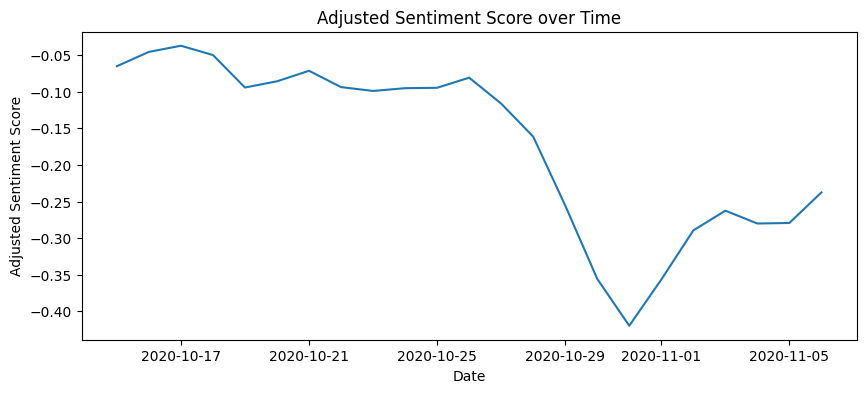

In [ ]:
import matplotlib.pyplot as plt

#Adjusted sentiment score over time for Biden
merged_b['created_at'] = pd.to_datetime(merged_b['created_at'])

fig, ax = plt.subplots(figsize=(10, 4))
plt.plot(merged_b['created_at'].dt.date.unique(), merged_b['adjusted_score'])
plt.title('Adjusted Sentiment Score over Time for Biden')
plt.xlabel('Date')
plt.ylabel('Adjusted Sentiment Score')
plt.show()

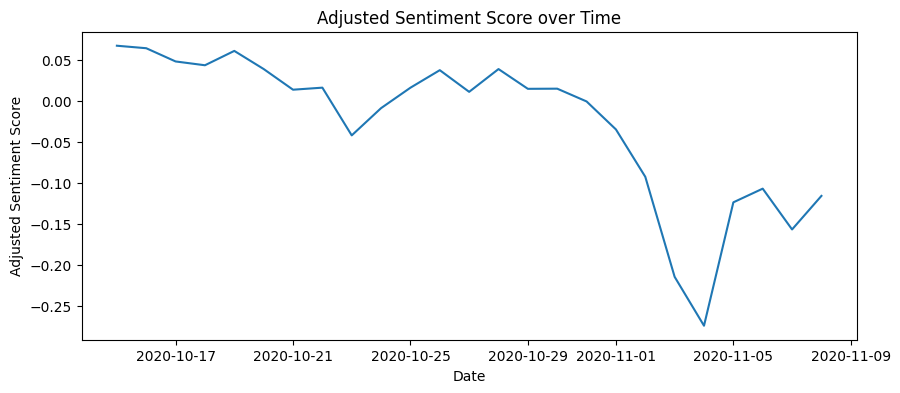

In [ ]:
import matplotlib.pyplot as plt

#Adjusted sentiment score over time for Trump
merged_t['created_at'] = pd.to_datetime(merged_t['created_at'])

fig, ax = plt.subplots(figsize=(10, 4))
plt.plot(merged_t['created_at'].dt.date.unique(), merged_t['adjusted_score'])
plt.title('Adjusted Sentiment Score over Time for Trump')
plt.xlabel('Date')
plt.ylabel('Adjusted Sentiment Score')
plt.show()

In [ ]:
#comparing the above two plots in one plot below to see the sentiment for each candidate on Twitter
fig = px.line(title='Adjusted Sentiment Score over Time')
fig.add_scatter(x=merged_b['created_at'].dt.date.unique(), y=merged_b['adjusted_score'], name='Biden')
fig.add_scatter(x=merged_t['created_at'].dt.date.unique(), y=merged_t['adjusted_score'], name='Trump')
fig.update_layout(xaxis_title='Date', yaxis_title='Adjusted Sentiment Score', legend_title='Brand')
fig.show()


ELECTION RESULTS

In [ ]:
new_elec_res['Candidate'] = new_elec_res['Candidate'].apply(clean_string)#applying the previously defined function to the columns
new_elec_res['Votes'] = new_elec_res['Votes'].apply(clean_int)#applying the previously defined function to the columns
new_elec_res['Percentage'] = new_elec_res['Percentage'].apply(clean_int)#applying the previously defined function to the columns
new_elec_res['Percentage'] = new_elec_res['Percentage']/100

In [ ]:
elec2020 = new_elec_res.loc[new_elec_res['Candidate'].isin(['RTrumpDonaldTrumpInIncumbent', 'DBidenJoeBiden'])]#selecting only rows with the particular values
elec2020
#list of abbr us states
states2 = ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'ME-1', 'ME-2', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NE-1', 'NE-2', 'NE-3', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']


elec2020['State'] = [state for state in states2 for i in range(2)]#assigning the abbr names to a column called states which is repeated 2 times as there are 2 candidates
name_map = {
    'RTrumpDonaldTrumpInIncumbent': 'Trump', 
    'DBidenJoeBiden': 'Biden'
}
elec2020['Candidate'] = elec2020['Candidate'].map(name_map)#renaming the original value as it was too long



elec2020

<ipython-input-83-cba377d02af8>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-83-cba377d02af8>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Candidate,Votes,Percentage,State
1,Trump,189951,53,AK
2,Biden,153778,43,AK
9,Trump,1441170,62,AL
10,Biden,849624,37,AL
13,Trump,760647,62,AR
...,...,...,...,...
371,Trump,1610184,49,WI
376,Trump,545382,69,WV
377,Biden,235984,30,WV
381,Trump,193559,70,WY


In [ ]:
#State wise winners of 2020 elections
colors = {'Trump': 'red','Biden': 'blue'}

#sorting by percentage of votes and grouping by states to pick only the first value in each state as that will be the highest
elec2020 = elec2020.sort_values(['State', 'Percentage'], ascending=[True, False])
elec2020 = elec2020.groupby(['State']).first().reset_index()

elec2020['Color'] = elec2020['Candidate'].map(colors)

fig = px.choropleth(elec2020, locations='State', color='Candidate',hover_name = 'Percentage',scope='usa',locationmode='USA-states', color_discrete_map=colors, title='Winner by State')

fig.show()
